In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importing data with players' age added. 
# SELECT
#     g2.day,
#     g2.player id,
#     pc.age,
#     g2.result
# FROM
#     game_2 g2
#     JOIN players_categorized pc 
#     ON g2.player = pc.id;
game_data = pd.read_csv('game_2_with_age.csv')

In [3]:
# Changing data types
game_data['DAY']= pd.to_datetime(game_data['DAY'], yearfirst=True)

In [4]:
game_data.head()

,DAY,ID,AGE,RESULT
0,2021-04-30,284,24,0
1,2020-12-21,430,72,5
2,2020-05-28,699,45,9
3,2021-04-01,536,51,2
4,2020-10-31,349,68,1


In [5]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5756 entries, 0 to 5755
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DAY     5756 non-null   datetime64[ns]
 1   ID      5756 non-null   int64         
 2   AGE     5756 non-null   int64         
 3   RESULT  5756 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 180.0 KB


In [6]:
game_data.describe()

,ID,AGE,RESULT
count,5756.000000,5756.000000,5756.000000
mean,499.739402,47.833218,4.461258
std,290.237877,18.044331,2.843877
min,0.000000,18.000000,0.000000
25%,250.750000,32.000000,2.000000
50%,499.000000,48.000000,4.000000
75%,753.000000,63.000000,7.000000
max,999.000000,79.000000,9.000000


(array([2950., 2806.]), array([18. , 48.5, 79. ]), <a list of 2 Patch objects>)

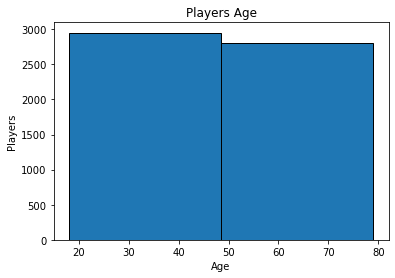

In [7]:
#Binning the age of the players to see the distribution more clearly 
plt.title('Players Age')
plt.xlabel('Age')
plt.ylabel('Players')
plt.hist(game_data['AGE'], bins=2, edgecolor='black')

In [8]:
# Introducing new column to divide players into two distinguish age groups.
game_data['Age Group'] = pd.cut(game_data['AGE'], [0, 50, 80], right=False, labels=['Under 50y', 'Over 50y'])
game_data['Age Group'].value_counts()

Under 50y    3026
Over 50y     2730
Name: Age Group, dtype: int64

Text(0.5, 1.0, 'Count of games in distinct age groups')

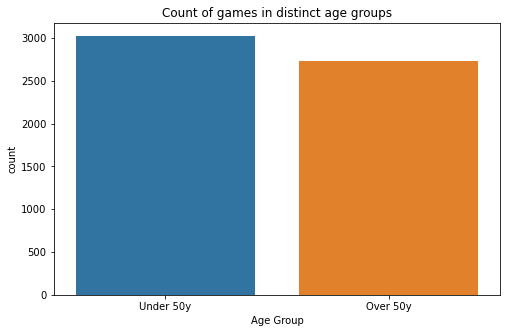

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age Group', data=game_data).set_title('Count of games in distinct age groups')

In [10]:
# SELECT 
#    COUNT(DISTINCT(g2.player))
# FROM
#     game_2 g2
#     JOIN players_categorized pc 
#     ON g2.player = pc.id
#     WHERE pc.age <50;
#QUERY RESULT = 531

In [11]:
# SELECT 
#    COUNT(DISTINCT(g2.player))
# FROM
#     game_2 g2
#     JOIN players_categorized pc 
#     ON g2.player = pc.id
#     WHERE pc.age >50;
#QUERY RESULT = 453

Text(0.5, 1.0, 'Count of players in distinct age groups')

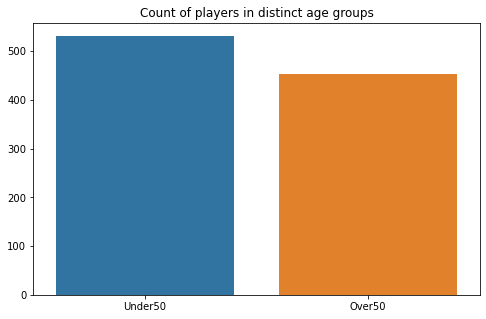

In [14]:
age_group_count= {'Age Group': ['Under50','Over50'], 'No. of Players': [531,453]  }
plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='No. of Players', data=age_group_count).set_title('Count of players in distinct age groups')

In [17]:
# The data set is quite balanced, meaning that both age groups have similar amount of players and number of games played. 
# We can therefore observe any deviation from the trend of the group over 50y/o comparing it
# to the group under 50y/o.

In [18]:
# Importing data with daily games of players under 50y/o. 
#  SELECT
#     g2.day,
#     count(age) daily_games
# FROM
#     game_2 g2
#     JOIN players_categorized pc 
#     ON g2.player = pc.id
#     where pc.age <50
#     group by
#     g2.day;
games_players_under50 = pd.read_csv('game_2_age_under50.csv')

In [19]:
# Changing data types.
games_players_under50['DAY']= pd.to_datetime(games_players_under50['DAY'], yearfirst=True)

In [20]:
games_players_under50.describe()

,DAILY_GAMES
count,362.000000
mean,8.359116
std,4.339254
min,1.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,21.000000


In [21]:
# Importing data with daily games of players over 50 y/o. 
#  SELECT
#     g2.day,
#     count(age) daily_games
# FROM
#     game_2 g2
#     JOIN players_categorized pc 
#     ON g2.player = pc.id
#     where pc.age >50
#     group by
#     g2.day;
games_players_over50 = pd.read_csv('game_2_age_over50.csv')

In [22]:
# Changing data types
games_players_over50['DAY']= pd.to_datetime(games_players_over50['DAY'], yearfirst=True)

In [23]:
games_players_over50.describe()

,DAILY_GAMES
count,364.000000
mean,7.296703
std,4.154043
min,1.000000
25%,4.000000
50%,6.500000
75%,9.000000
max,23.000000


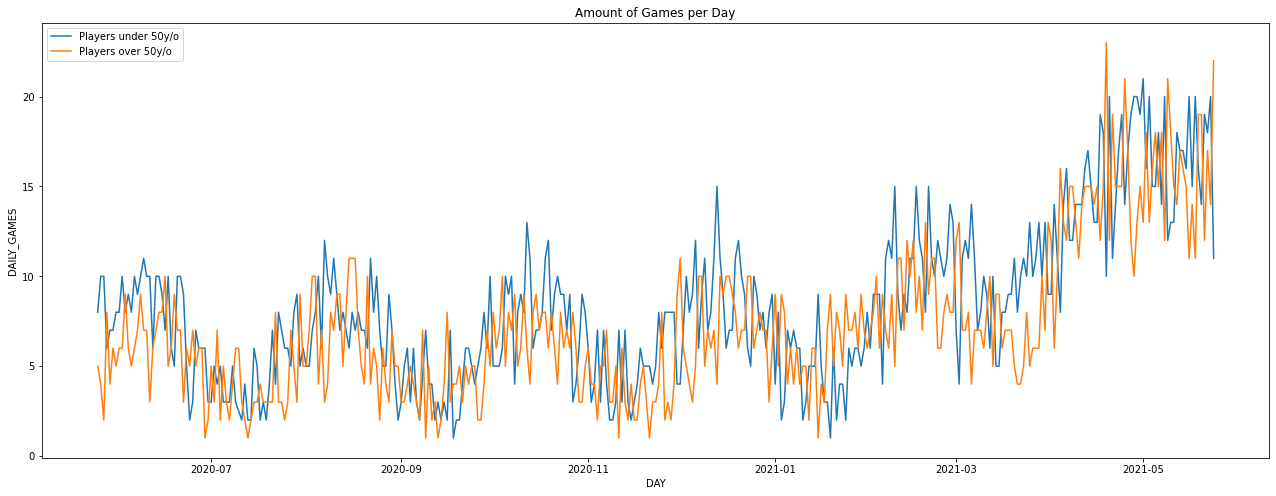

In [24]:
# Creating the time series plot for both age groups.
plt.figure(figsize=(22, 8))
sns.lineplot(x = 'DAY', y = 'DAILY_GAMES', data = games_players_under50,
     label = 'Players under 50y/o').set_title('Amount of Games per Day')
sns.lineplot(x = 'DAY', y = 'DAILY_GAMES', data = games_players_over50,
             label = 'Players over 50y/o')

In [25]:
# As the data fluctuates a lot we need to introduce a rolling average to both data sets.
games_players_under50["DAILY_ROLLING_AVG"] = games_players_under50.DAILY_GAMES.rolling(5).mean()
games_players_over50["DAILY_ROLLING_AVG"] = games_players_under50.DAILY_GAMES.rolling(5).mean()

In [26]:
games_players_under50.tail(100)

,DAY,DAILY_GAMES,DAILY_ROLLING_AVG
262,2021-01-31,8,9.8
263,2020-10-12,13,10.6
264,2021-01-07,7,11.2
265,2020-11-12,3,7.8
266,2020-10-10,9,8.0
...,...,...,...
357,2020-09-10,4,7.2
358,2020-10-05,10,8.6
359,2020-12-24,5,8.8
360,2020-09-24,5,7.6


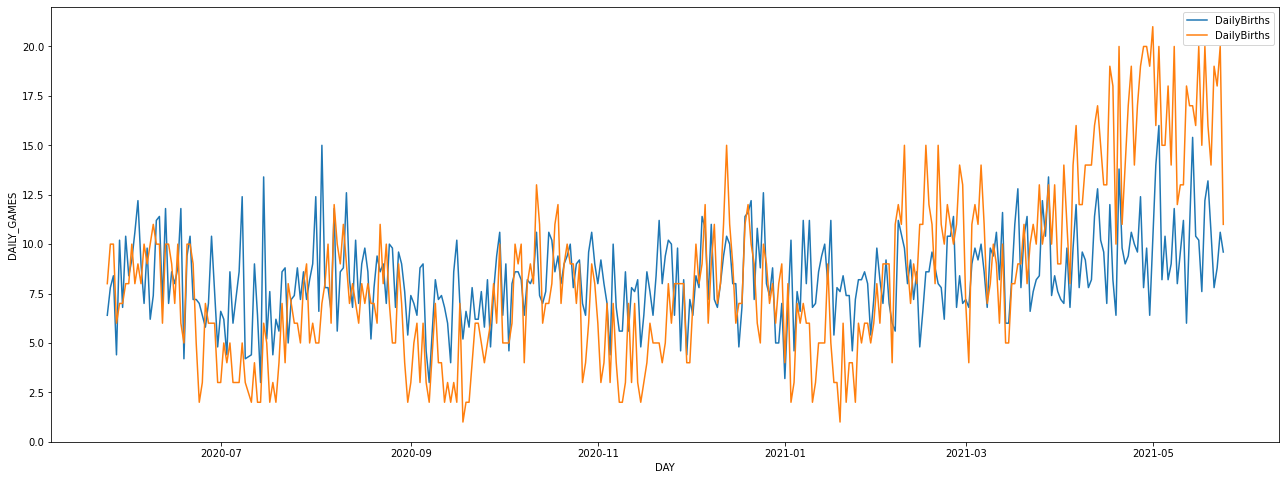

In [27]:
# Compering the rolling average with original values.
plt.figure(figsize=(22, 8))
sns.lineplot( x = 'DAY',
             y = 'DAILY_ROLLING_AVG',
             data = games_players_under50,
             label = 'DailyBirths')
sns.lineplot( x = 'DAY',
             y = 'DAILY_GAMES',
             data = games_players_under50,
             label = 'DailyBirths')

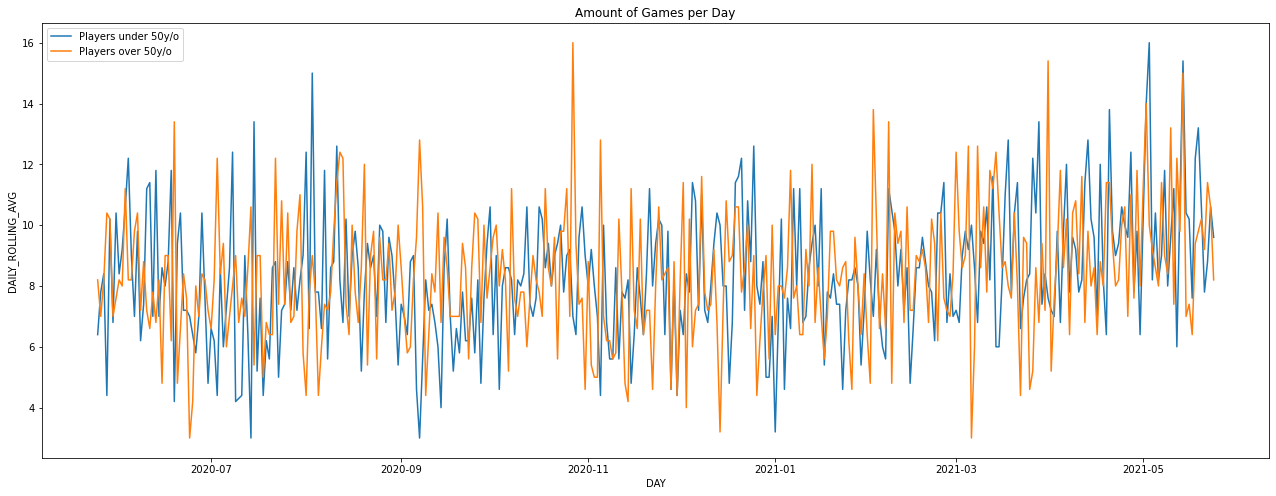

In [28]:
# Creating the time series plot for both age groups with rolling average.
plt.figure(figsize=(22, 8))
sns.lineplot(x = 'DAY', y = 'DAILY_ROLLING_AVG', data = games_players_under50,
     label = 'Players under 50y/o').set_title('Amount of Games per Day')
sns.lineplot(x = 'DAY', y = 'DAILY_ROLLING_AVG', data = games_players_over50,
             label = 'Players over 50y/o')

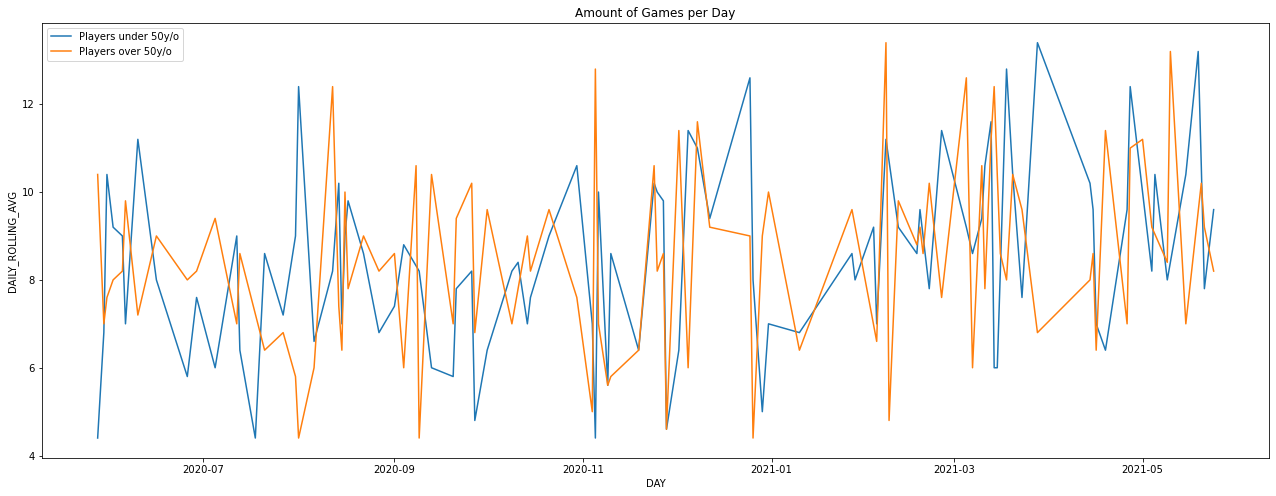

In [29]:
# Creating the time series plot for both age groups with rolling average with less data.
plt.figure(figsize=(22, 8))
sns.lineplot(x = 'DAY', y = 'DAILY_ROLLING_AVG', data = games_players_under50[:100],
     label = 'Players under 50y/o').set_title('Amount of Games per Day')
sns.lineplot(x = 'DAY', y = 'DAILY_ROLLING_AVG', data = games_players_over50[:100],
             label = 'Players over 50y/o')

In [30]:
# Data still fluctuates to much. Will try to reshape the data from days to months.

In [31]:
#Setting the index for games_players_under50.
games_players_under50.set_index('DAY', inplace=True)

In [32]:
#Resampling games_players_under50. 
resample_under50 = games_players_under50.resample('M')

In [33]:
#Setting the index games_players_over50.
games_players_over50.set_index('DAY', inplace=True)

In [34]:
#Resampling games_players_over50. 
resample_over50 = games_players_over50.resample('M')

            DAILY_GAMES  DAILY_ROLLING_AVG
DAY                                       
2020-05-31     8.000000           7.771429
2020-06-30     7.766667           8.426667
2020-07-31     4.620690           7.179310
2020-08-31     7.451613           8.658065
2020-09-30     4.379310           7.013793
2020-10-31     7.870968           8.412903
2020-11-30     5.000000           7.560000
2020-12-31     8.612903           8.561290
2021-01-31     4.838710           7.793548
2021-02-28    10.500000           8.138462
2021-03-31     9.451613           9.058065
2021-04-30    14.966667           9.380000
2021-05-31    16.583333          10.454545


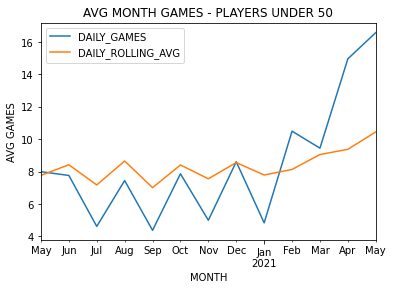

In [35]:
monthly_mean_under50 = resample_under50.mean()
print(monthly_mean_under50.head(18))
monthly_mean_under50.plot()
plt.xlabel('MONTH') 
plt.ylabel('AVG GAMES')
plt.title('AVG MONTH GAMES - PLAYERS UNDER 50')
plt.show()

            DAILY_GAMES  DAILY_ROLLING_AVG
DAY                                       
2020-05-31     4.857143           8.371429
2020-06-30     6.166667           7.746667
2020-07-31     3.900000           8.172414
2020-08-31     6.516129           8.283871
2020-09-30     3.833333           8.160000
2020-10-31     6.645161           8.483871
2020-11-30     3.833333           7.193103
2020-12-31     7.193548           8.051613
2021-01-31     6.032258           7.926667
2021-02-28     8.714286           8.466667
2021-03-31     7.258065           8.993548
2021-04-30    14.166667           9.033333
2021-05-31    15.750000           9.936364


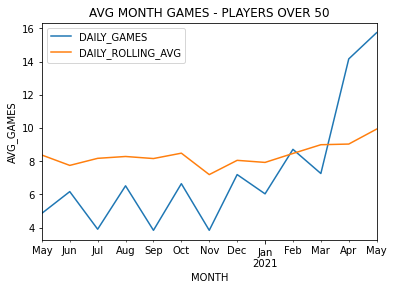

In [36]:
monthly_mean_over50 = resample_over50.mean()
print(monthly_mean_over50.head(18))
monthly_mean_over50.plot()
plt.xlabel('MONTH') 
plt.ylabel('AVG_GAMES')
plt.title('AVG MONTH GAMES - PLAYERS OVER 50')
plt.show()

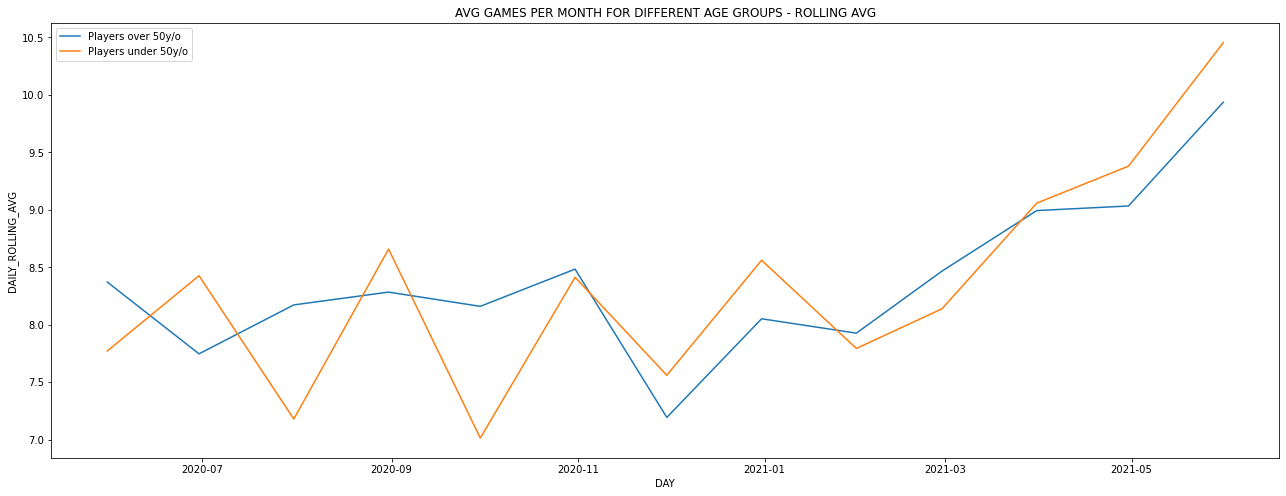

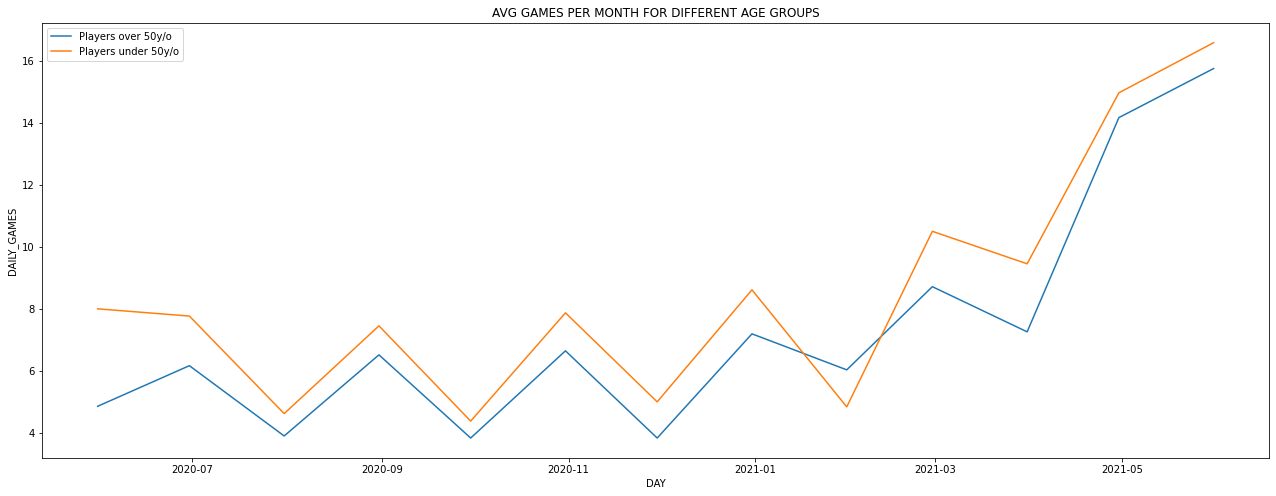

In [37]:
#Plots for 'AVG GAMES FOR DIFFERENT AGE GROUPS.
plt.figure(figsize=(22, 8))
sns.lineplot(x = monthly_mean_over50.index, y = 'DAILY_ROLLING_AVG', data = monthly_mean_over50[:100],
     label = 'Players over 50y/o').set_title('AVG GAMES PER MONTH FOR DIFFERENT AGE GROUPS - ROLLING AVG')
sns.lineplot(x = monthly_mean_under50.index, y = 'DAILY_ROLLING_AVG', data = monthly_mean_under50,
             label = 'Players under 50y/o')
plt.figure(figsize=(22, 8))
sns.lineplot(x = monthly_mean_over50.index, y = 'DAILY_GAMES', data = monthly_mean_over50[:100],
     label = 'Players over 50y/o').set_title('AVG GAMES PER MONTH FOR DIFFERENT AGE GROUPS')
sns.lineplot(x = monthly_mean_under50.index, y = 'DAILY_GAMES', data = monthly_mean_under50,
             label = 'Players under 50y/o')